In [1]:
from importlib import import_module
import tensorflow as tf
import keras
from keras.api._v2 import keras as KerasAPI
keras: KerasAPI = import_module("tensorflow.keras")
print(tf.__version__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils import plot_model

from keras.utils import load_img
from keras.utils import img_to_array

import os

from sklearn.preprocessing import LabelEncoder

2.10.0


In [2]:
path = ''
# from google.colab import drive
# drive.mount('/content/drive')
# path = '/content/drive/MyDrive/deepLearningAs3/'

pathfinal = path + 'model_history/'
pathload = path + 'resultModel/'

epoch_val = 10000
batch_size_val = 1
threshold_val = 1e-4

random_state_global = 42
learning_rate_val = 1e-3
momentum_val = 0.9

# Hidden_layer_I_N = 16
# Hidden_layer_II_N = 16
# Hidden_layer_III_N = 16
# Hidden_layer_IV_N = 16
Output_layer_N = 5

Hidden_layer_Activation = "tanh"
Output_layer_Activation = "softmax"

ema_momentum_val = 0.99 # beta
epsilon_val = 1e-8
beta_1_val = 0.9
beta_2_val = 0.999

i = 'a'
ii = 'a'
iii = 'a'
iv = 'a'
v = 'a'
vi = 'a'
vii = 'a'
al = 'a'

epoch_val_a = epoch_val
batch_size_val_a = batch_size_val

epoch_val_b = 30000
batch_size_val_b = 11385 # df_train.shape[0] # 11385

epoch_val_c = epoch_val
batch_size_val_c = batch_size_val

epoch_val_d = epoch_val
batch_size_val_d = batch_size_val

epoch_val_e = epoch_val
batch_size_val_e = batch_size_val

epoch_val_f = epoch_val
batch_size_val_f = batch_size_val

epoch_val_g = epoch_val
batch_size_val_g = batch_size_val

class_l_r_to_d = {0:0, 1:1, 2:2, 4:3, 9:4}
class_l_d_to_r = {0:0, 1:1, 2:2, 3:4, 4:9}

read and saving data

In [3]:
%%script echo skipping
# level 0 path
l0 = 'Group_20'

DATASET = {0:pd.DataFrame(), 1:pd.DataFrame(), 2:pd.DataFrame()}
temp_dict = {'train':0, 'val':1, 'test':2}

# iterate over files in
# that l0
for l1 in os.listdir(l0):
    f1 = os.path.join(l0, l1)
    for l2 in os.listdir(f1):
        f2 = os.path.join(f1, l2)
        for l3 in os.listdir(f2):
            f3 = os.path.join(f2, l3)
            # print(f3)
            img = load_img(f3, color_mode = "grayscale")
            data_point = tf.squeeze(tf.constant(img_to_array(img)))
            # print("shape:", data_point.shape) # shape: (28, 28)
            # data_point = data_point/255
            # print(tf.math.reduce_min(data_point), tf.math.reduce_max(data_point))
            # plt.imshow(data_point)
            # plt.show()

            temp = tf.reshape(data_point, shape=[-1]).numpy().tolist()
            
            #appending label
            temp.append(int(l2))

            # print("shape:",temp.shape) #shape: (784,)
            row = pd.Series(temp)
            # print('1')
            DATASET[temp_dict[l1]] = pd.concat([DATASET[temp_dict[l1]], row], axis=1)
            # plt.imshow(tf.reshape(temp, shape=(28,28)))
            # plt.show()


df_train = DATASET[0].transpose()
df_valid = DATASET[1].transpose()
df_test = DATASET[2].transpose()

## saving data
df_train.to_csv('df_train.csv', index=False)
df_valid.to_csv('df_valid.csv', index=False)
df_test.to_csv('df_test.csv', index=False)

skipping


In [4]:
def label_encoding(df):
    df[df.columns[-1]] = LabelEncoder().fit_transform(df.iloc[:,-1])
    return df

def normalizing_data(df):
    temp = df[df.columns[-1]]
    df = df/255
    df[df.columns[-1]] = temp
    return df

# plt.figure(figsize=(7, 10))
def data_visualize(df):
  np.random.seed(random_state_global)
  plt.figure(figsize=(12, 12))
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    rand_index = np.random.choice(range(len(df)))
    plt.imshow(tf.reshape(df.iloc[rand_index,:-1], shape=(28,28)), cmap=plt.cm.binary)
    plt.title(f'{class_l_d_to_r[df.iloc[rand_index,-1]]}')
    # plt.axis(False)
  plt.tight_layout()

In [5]:
df_train = pd.read_csv(path+'df_train.csv', dtype='float32')
df_valid = pd.read_csv(path+'df_valid.csv', dtype='float32')
df_test = pd.read_csv(path+'df_test.csv', dtype='float32')

print('df_train:', df_train.groupby(['784']).count().iloc[:,-1].to_dict())
print('df_valid:', df_valid.groupby(['784']).count().iloc[:,-1].to_dict())
print('df_test:', df_test.groupby(['784']).count().iloc[:,-1].to_dict())
print()

print(f'Initial Data Range: {min(df_train.iloc[:,:-1].min())} to {max(df_train.iloc[:,:-1].max())}')

df_train = label_encoding(normalizing_data(df_train))
df_valid = label_encoding(normalizing_data(df_valid))
df_test = label_encoding(normalizing_data(df_test))
print(f'Final Data Range: {min(df_train.iloc[:,:-1].min())} to {max(df_train.iloc[:,:-1].max())}')
print('Label Encoded')

print('Train Data',df_train.shape)
print('Valid Data',df_valid.shape)
print('Test Data' ,df_test.shape)

df_train: {0.0: 2277, 1.0: 2277, 2.0: 2277, 4.0: 2277, 9.0: 2277}
df_valid: {0.0: 759, 1.0: 759, 2.0: 759, 4.0: 759, 9.0: 759}
df_test: {0.0: 759, 1.0: 759, 2.0: 759, 4.0: 759, 9.0: 759}

Initial Data Range: 0.0 to 255.0
Final Data Range: 0.0 to 1.0
Label Encoded
Train Data (11385, 785)
Valid Data (3795, 785)
Test Data (3795, 785)


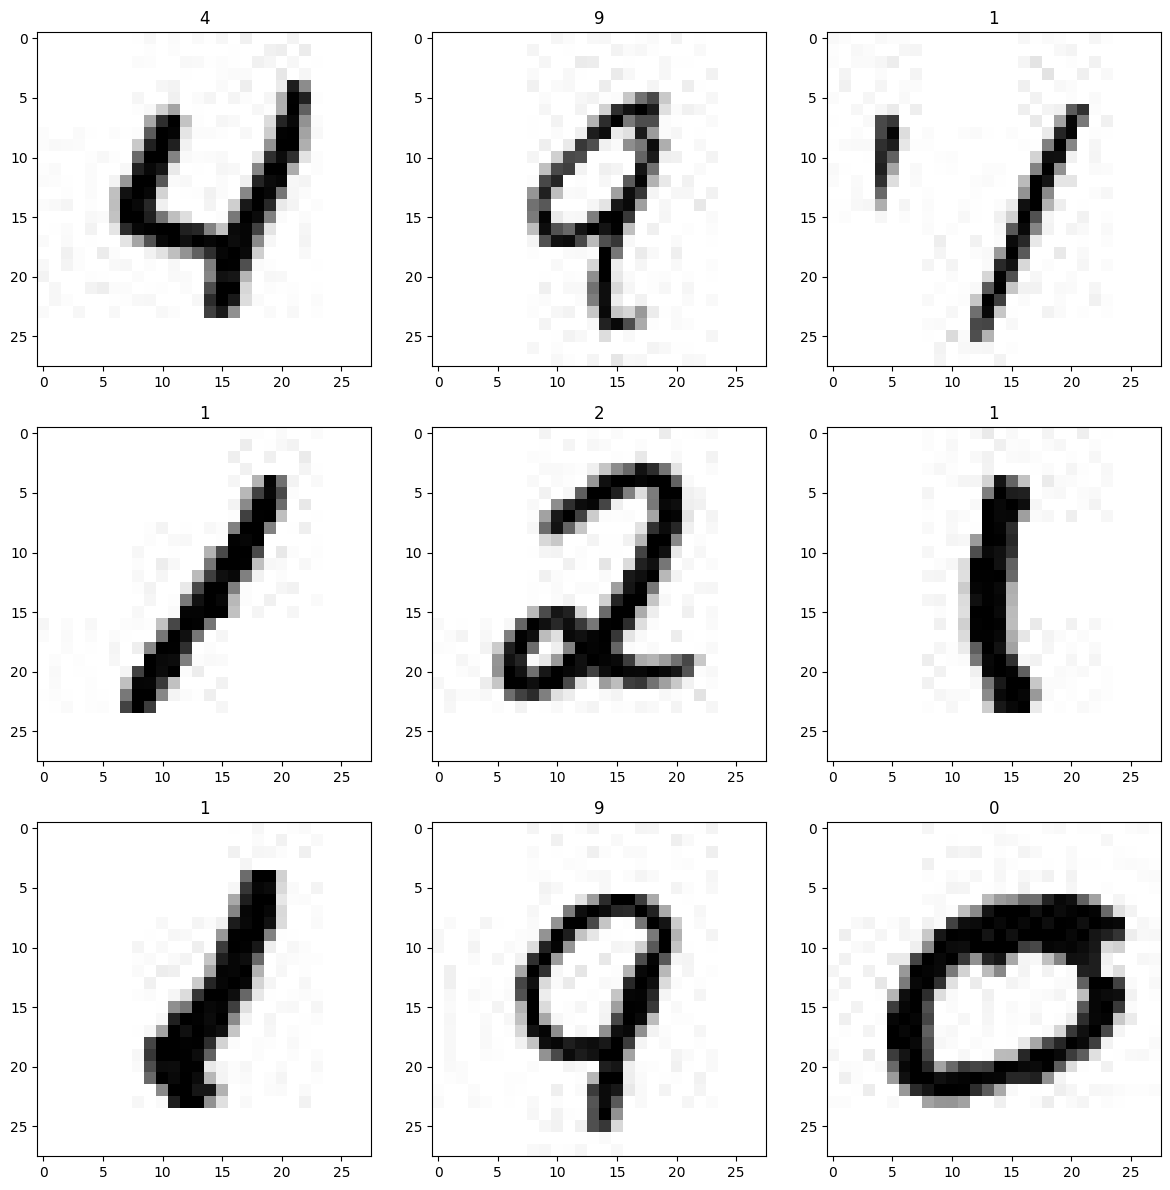

In [6]:
data_visualize(df_train)

In [7]:
# Import label encoder
ll = [9,9,4,0,0,1,2]
print(LabelEncoder().fit_transform(ll))

print(ll)

[4 4 3 0 0 1 2]
[9, 9, 4, 0, 0, 1, 2]


In [8]:
# Check out a random image as well as its prediction
# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  np.random.seed(random_state_global+1)
  plt.figure(figsize=(12, 12))
  for iter in range(9):
    ax = plt.subplot(3, 3, iter + 1)
    
    # global seed
    # Setup random integer
    i = np.random.randint(0, len(images))
    
    # Create predictions and targets
    target_image = images.iloc[i,:]
    pred_probs = model.predict(tf.reshape(target_image, shape=(1,784)), verbose=0) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the target image
    plt.imshow(tf.reshape(target_image, shape=(28,28)), cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel(f'Pred: {pred_label} with {100*tf.reduce_max(pred_probs):.0f}% accuracy (True: {true_label})', color=color)

    # plt.axis(False)
  plt.tight_layout()

def testingImages(model):
    for i in range(1):
        plot_random_image(model=model, 
                    images=df_test.iloc[:,:-1], 
                    true_labels=df_test.iloc[:,-1], 
                    classes=[0,1,2,4,9])


In [9]:
i = np.random.randint(0, 5)
i

2

In [10]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=10): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)
    

def inferences(df_model_history, model):
    print(f'Training Accuracy for model: {df_model_history["accuracy"].to_list()[-1]*100:.2f}%')
    print(f'Validation Accuracy for model: {df_model_history["val_accuracy"].to_list()[-1]*100:.2f}%')
    print(f'Test Accuracy for model: {model.evaluate(df_test.iloc[:,:-1], df_test.iloc[:,-1], verbose=0)[1]*100:.2f}%')

    df_model_history.plot(title="Accuracy / Loss vs Epoch", xlabel='Epoch', ylabel='Accuracy / Loss')
    plt.show()

    df_model_history['loss'].plot(title="Average training error vs epochs", xlabel='Epoch', ylabel='Loss')
    plt.show()

def makingPredictionWithCM(model):
    #Predicting one sample
    print('y_prob_a for one sample',model.predict(tf.reshape(df_test.iloc[0,:-1], shape=(1,784)), verbose=0))

    y_true = df_test.iloc[:,-1]
    y_prob_a = model.predict(df_test.iloc[:,:-1], verbose=0)
    y_pred_a = y_prob_a.argmax(axis=1)
    make_confusion_matrix(y_true, y_pred_a, classes=list(map(lambda el: class_l_d_to_r[el], [0,1,2,3,4])))

def showResults(model, history):
    inferences(history, model)
    makingPredictionWithCM(model)
    testingImages(model)

In [11]:
# class StopOnThreshold(keras.callbacks.Callback):
#     def __init__(self, threshold):
#         super(StopOnThreshold, self).__init__()
#         self.threshold = threshold
#         self.previous_error = float('inf')
    
#     def on_epoch_end(self, epoch, logs=None):
#         current_error = logs.get('loss')
#         # print(f'\nEpoch {epoch+1} curent Err:{current_error}, Previous Err:{self.previous_error}')
#         if abs(current_error - self.previous_error) < self.threshold:
#             self.model.stop_training = True
#             print('\n\n********\nThreshold Reached\n********\n')
#         self.previous_error = current_error

class ModelSaving(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # saving the model
        if(self.model.name=='model_b'):
            if((epoch+1)%500==0):
                self.model.save(f'{pathfinal}{self.model.name}_{epoch+1}.h5')
        else:
            self.model.save(f'{pathfinal}{self.model.name}_{epoch+1}.h5')

class HistorySaver(keras.callbacks.Callback):
    def __init__(self):
        super(HistorySaver, self).__init__()
        self.history = {}
# dict_items([('loss', 1.3612865209579468), ('accuracy', 0.46034255623817444), ('val_loss', 1.1157031059265137), ('val_accuracy', 0.6484848856925964)])
    def on_epoch_end(self, epoch, logs=None):
        for key, value in logs.items():
            self.history.setdefault(key, []).append(value)

        if(self.model.name=='model_b'):
            if((epoch+1)%500==0):
                pd.DataFrame(self.history).to_csv(f'{pathfinal}{self.model.name}_{epoch+1}.csv', index=False)
        else:
            pd.DataFrame(self.history).to_csv(f'{pathfinal}{self.model.name}_{epoch+1}.csv', index=False)


# create the callbacks

model_saver = ModelSaving()

# not initialize HistorySaver() here initialize inside function 
# stop_on_threshold = StopOnThreshold(threshold=threshold_val)

# This means if for 5 epochs the accuracy has no progress on 
# the validation set then it would stop and store the previous best value.
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='loss',
                                                  patience=1,
                                                  min_delta=threshold_val,
                                                  mode='min',
                                                  restore_best_weights=True, 
                                                  verbose=1)

# (v) AdaGrad – (batch_size=1)

2023-03-22 19:43:14.893482: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Restoring model weights from the end of the best epoch: 236.
Epoch 237: early stopping
         loss  accuracy  val_loss  val_accuracy
0    0.699766  0.880193  0.465601      0.931752
1    0.402084  0.935705  0.347585      0.942819
2    0.320881  0.944488  0.291768      0.947826
3    0.276777  0.948441  0.257989      0.950725
4    0.248680  0.950110  0.234209      0.952306
..        ...       ...       ...           ...
232  0.073755  0.978480  0.094657      0.971542
233  0.073648  0.978480  0.094541      0.971278
234  0.073538  0.978480  0.094447      0.971278
235  0.073424  0.978393  0.094468      0.971542
236  0.073325  0.978480  0.094380      0.971542

[237 rows x 4 columns]
Training Accuracy for model: 97.85%
Validation Accuracy for model: 97.15%
Test Accuracy for model: 97.05%


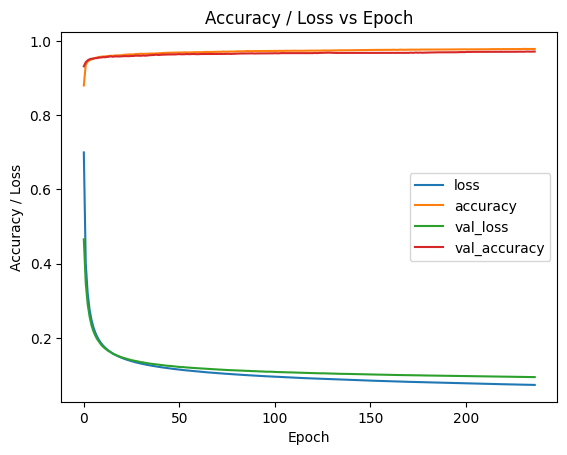

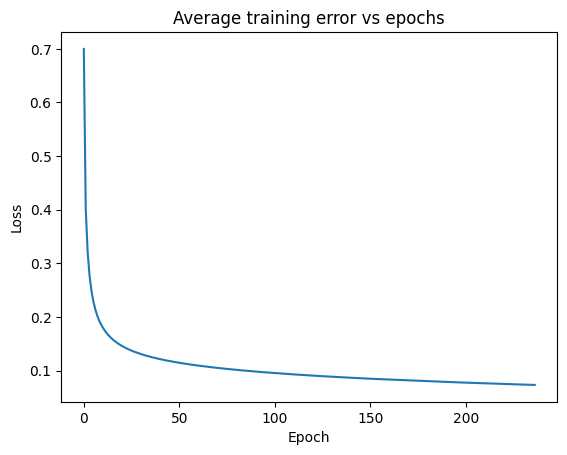

y_prob_a for one sample [[1.6098132e-03 7.1025069e-04 1.2422720e-03 3.6549298e-03 9.9278271e-01]]


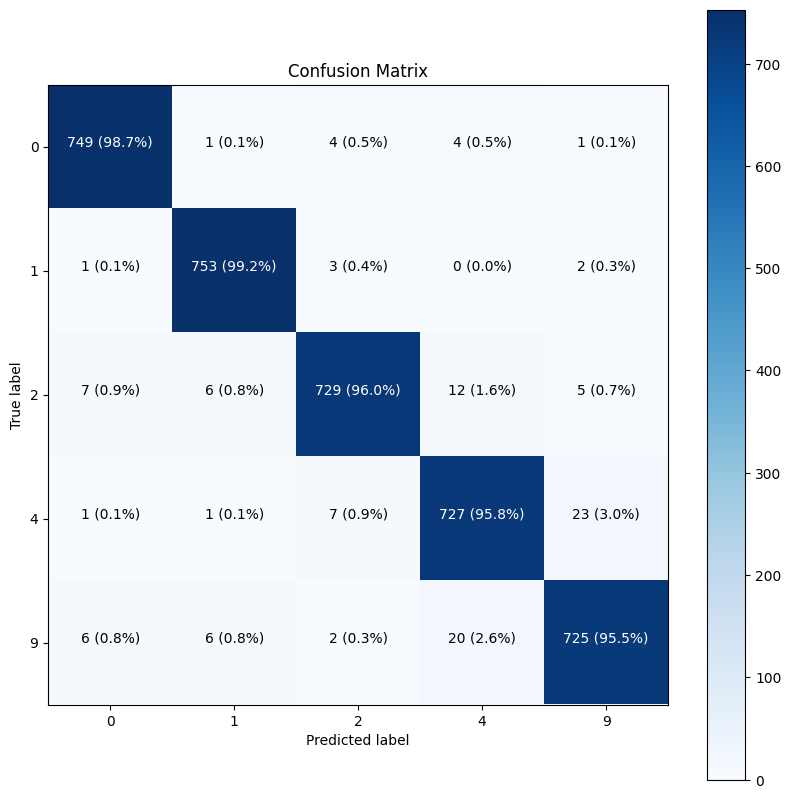

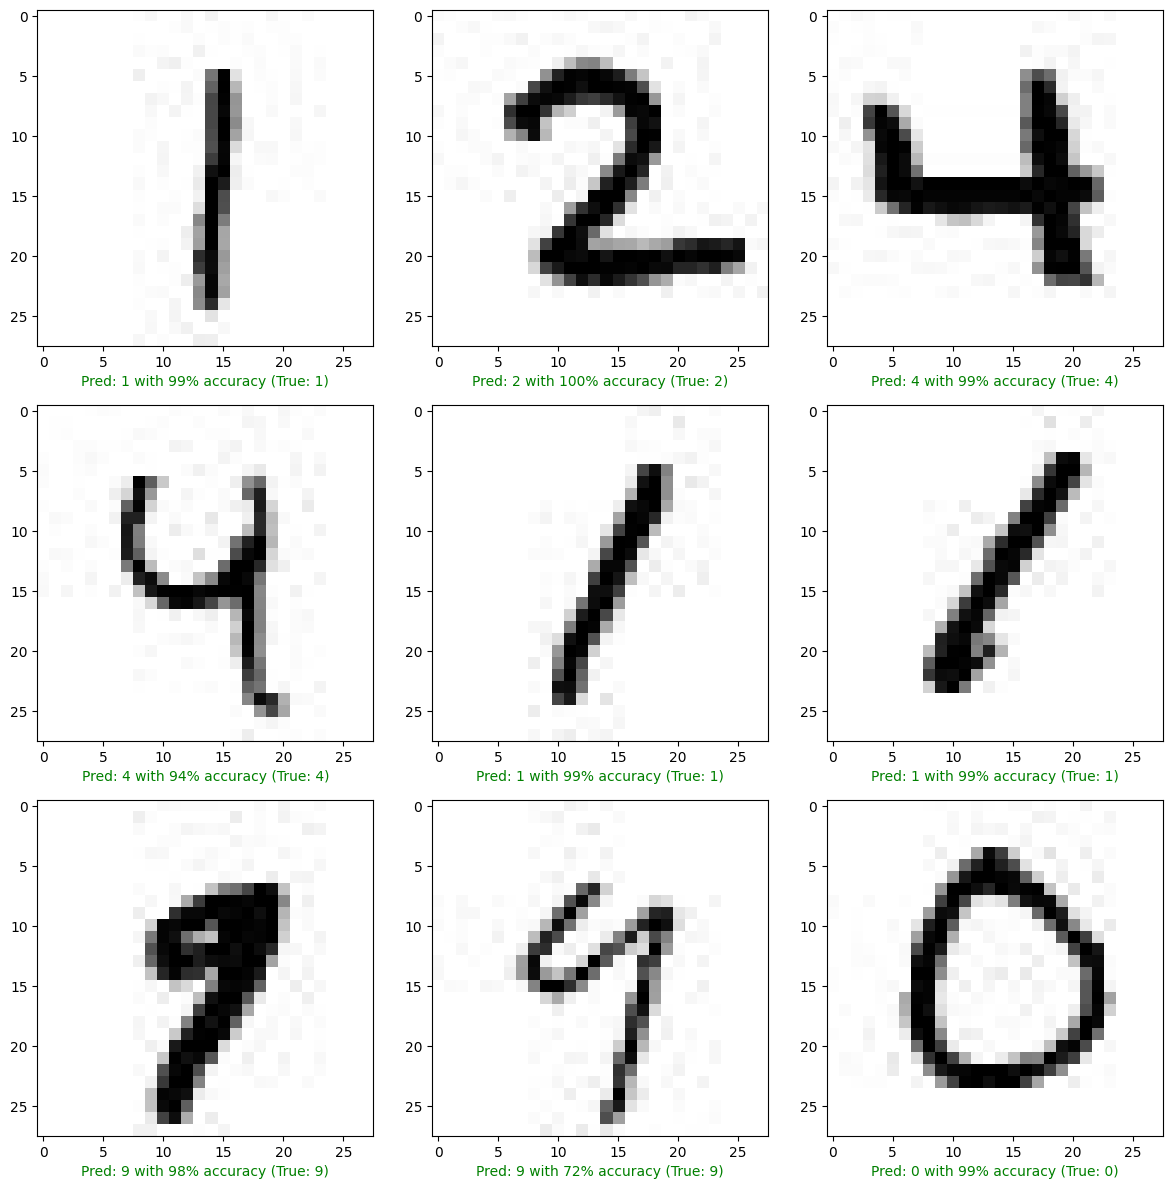

In [12]:
# %%script echo skipping
# Set random seed
tf.random.set_seed(random_state_global)

# Create the model
model_e = keras.Sequential([
  keras.Input(shape=(784,), name="Input_layer"),
  keras.layers.Dense(16, activation=Hidden_layer_Activation, name="Hidden_layer_I"),
  keras.layers.Dense(16, activation=Hidden_layer_Activation, name="Hidden_layer_II"),
  keras.layers.Dense(16, activation=Hidden_layer_Activation, name="Hidden_layer_III"), 
  keras.layers.Dense(Output_layer_N, activation=Output_layer_Activation, name="Output_layer")
], name='model_e')

# Compile the model
model_e.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                optimizer=keras.optimizers.Adagrad(learning_rate=learning_rate_val), 
                metrics=["accuracy"])


# Fit the model
history_e = model_e.fit(df_train.iloc[:,:-1],
                      df_train.iloc[:,-1],
                      epochs=epoch_val_e,
                      batch_size=batch_size_val_e,
                      validation_data=(df_valid.iloc[:,:-1], df_valid.iloc[:,-1]),
                      callbacks=[early_stopping_cb], verbose=0)

df_model_e_history = pd.DataFrame(history_e.history)

df_model_e_history.to_csv(f'{pathfinal}model_e_16_16_16_{history_e.epoch[-1]}.csv', index=False)
model_e.save(f'{pathfinal}model_e_16_16_16_{history_e.epoch[-1]}.h5') 

print(df_model_e_history)

showResults(model_e, df_model_e_history)

Restoring model weights from the end of the best epoch: 259.
Epoch 260: early stopping
         loss  accuracy  val_loss  val_accuracy
0    0.626947  0.864998  0.414263      0.928327
1    0.359520  0.934124  0.306959      0.943610
2    0.285353  0.944313  0.256961      0.947563
3    0.246134  0.950198  0.227744      0.950988
4    0.221831  0.950988  0.207677      0.952042
..        ...       ...       ...           ...
255  0.061924  0.981994  0.084549      0.973386
256  0.061820  0.982082  0.084509      0.973386
257  0.061707  0.981994  0.084412      0.973386
258  0.061596  0.982082  0.084357      0.973386
259  0.061501  0.982170  0.084337      0.973386

[260 rows x 4 columns]
Training Accuracy for model: 98.22%
Validation Accuracy for model: 97.34%
Test Accuracy for model: 97.13%


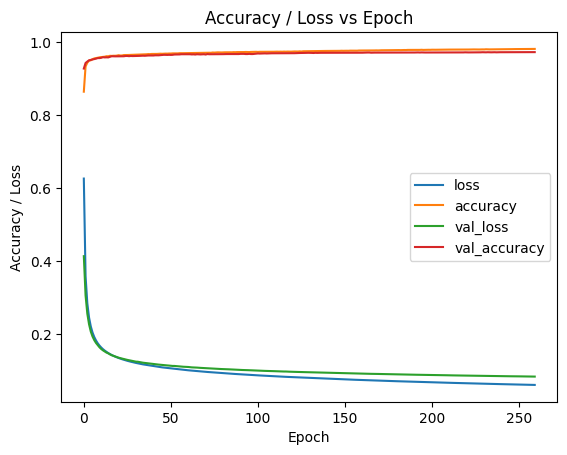

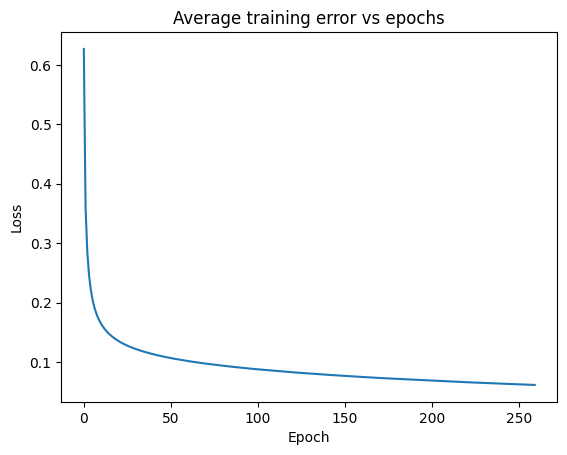

y_prob_a for one sample [[1.0614764e-04 1.6010369e-03 5.7525304e-04 2.7593600e-03 9.9495822e-01]]


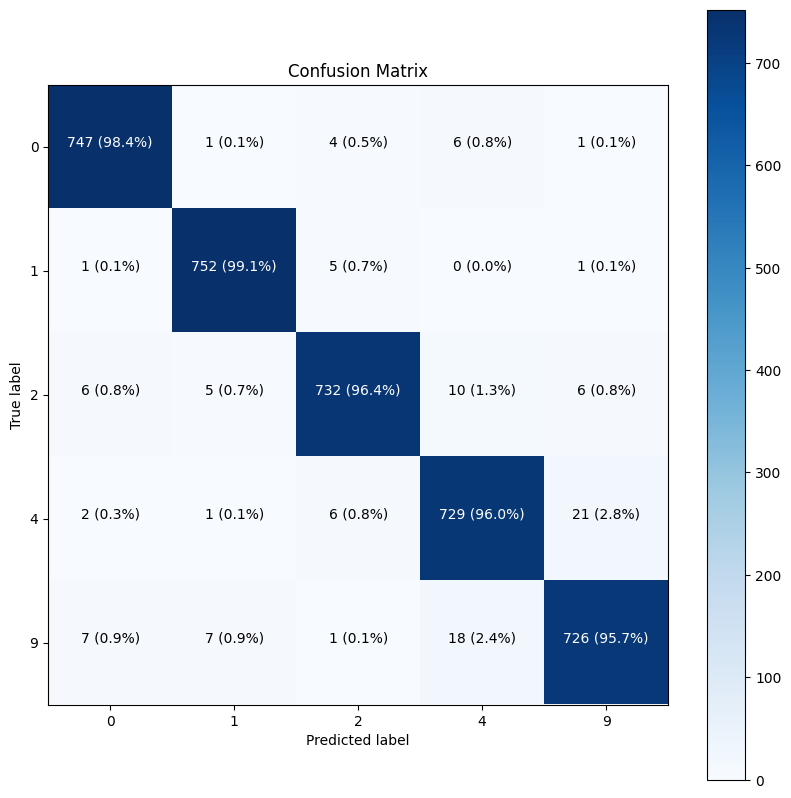

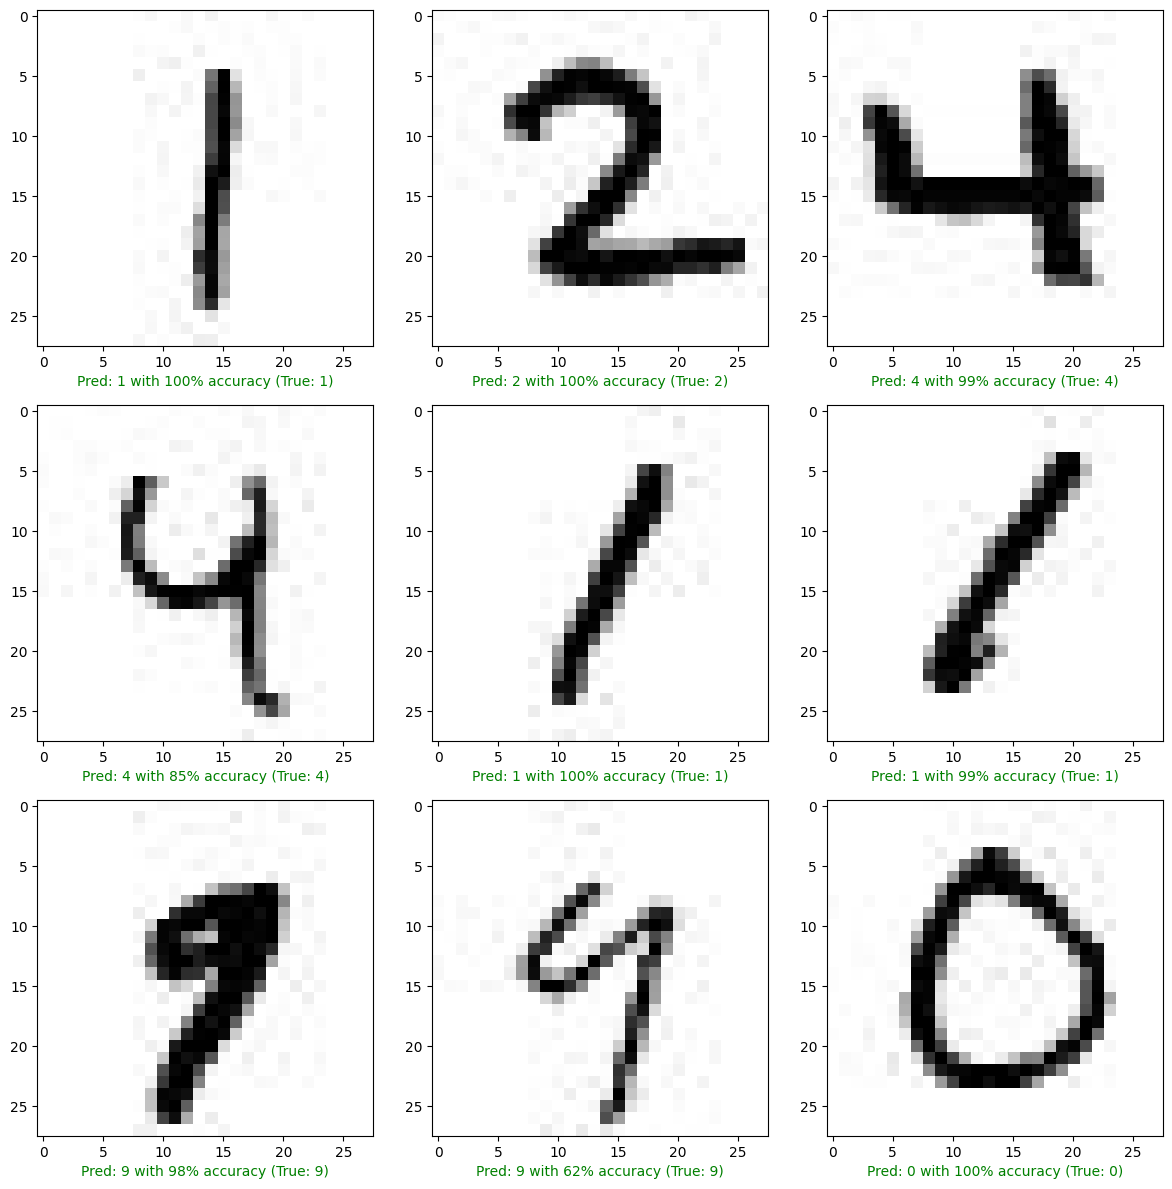

In [13]:
# %%script echo skipping
# Set random seed
tf.random.set_seed(random_state_global)

# Create the model
model_e = keras.Sequential([
  keras.Input(shape=(784,), name="Input_layer"),
  keras.layers.Dense(20, activation=Hidden_layer_Activation, name="Hidden_layer_I"),
  keras.layers.Dense(20, activation=Hidden_layer_Activation, name="Hidden_layer_II"),
  keras.layers.Dense(20, activation=Hidden_layer_Activation, name="Hidden_layer_III"), 
  keras.layers.Dense(Output_layer_N, activation=Output_layer_Activation, name="Output_layer")
], name='model_e')

# Compile the model
model_e.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                optimizer=keras.optimizers.Adagrad(learning_rate=learning_rate_val), 
                metrics=["accuracy"])


# Fit the model
history_e = model_e.fit(df_train.iloc[:,:-1],
                      df_train.iloc[:,-1],
                      epochs=epoch_val_e,
                      batch_size=batch_size_val_e,
                      validation_data=(df_valid.iloc[:,:-1], df_valid.iloc[:,-1]),
                      callbacks=[early_stopping_cb], verbose=0)

df_model_e_history = pd.DataFrame(history_e.history)

df_model_e_history.to_csv(f'{pathfinal}model_e_20_20_20_{history_e.epoch[-1]}.csv', index=False)
model_e.save(f'{pathfinal}model_e_20_20_20_{history_e.epoch[-1]}.h5') 

print(df_model_e_history)

showResults(model_e, df_model_e_history)

Restoring model weights from the end of the best epoch: 265.
Epoch 266: early stopping
         loss  accuracy  val_loss  val_accuracy
0    0.704304  0.839262  0.542766      0.886166
1    0.487139  0.904875  0.442661      0.918841
2    0.412281  0.924989  0.384319      0.935441
3    0.364236  0.934036  0.344381      0.941502
4    0.329788  0.940799  0.313422      0.947299
..        ...       ...       ...           ...
261  0.069980  0.981028  0.091360      0.973123
262  0.069864  0.981028  0.091327      0.973123
263  0.069746  0.981028  0.091226      0.973123
264  0.069603  0.981203  0.090952      0.973386
265  0.069512  0.981379  0.090993      0.972859

[266 rows x 4 columns]
Training Accuracy for model: 98.14%
Validation Accuracy for model: 97.29%
Test Accuracy for model: 97.13%


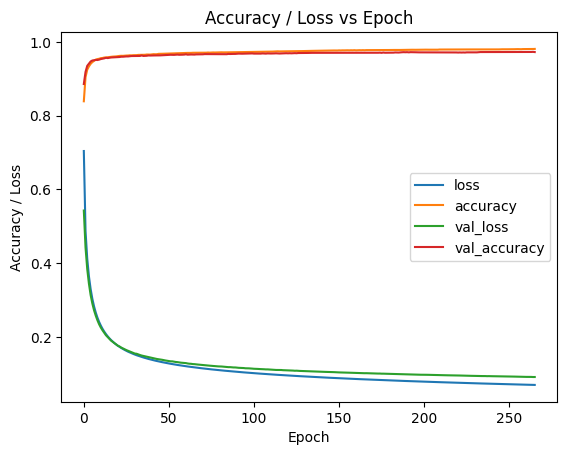

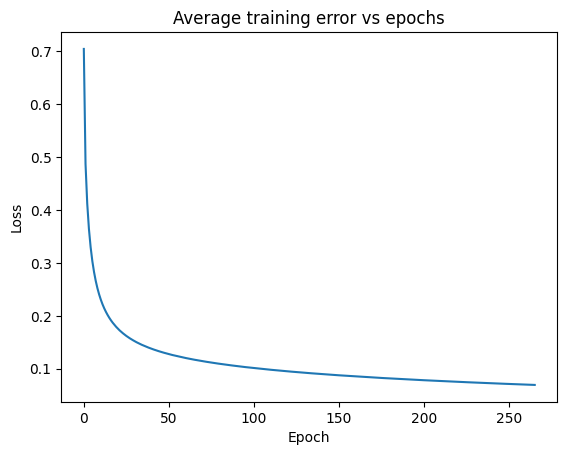

y_prob_a for one sample [[1.6929538e-03 5.1002641e-04 2.3190414e-03 7.8799222e-03 9.8759812e-01]]


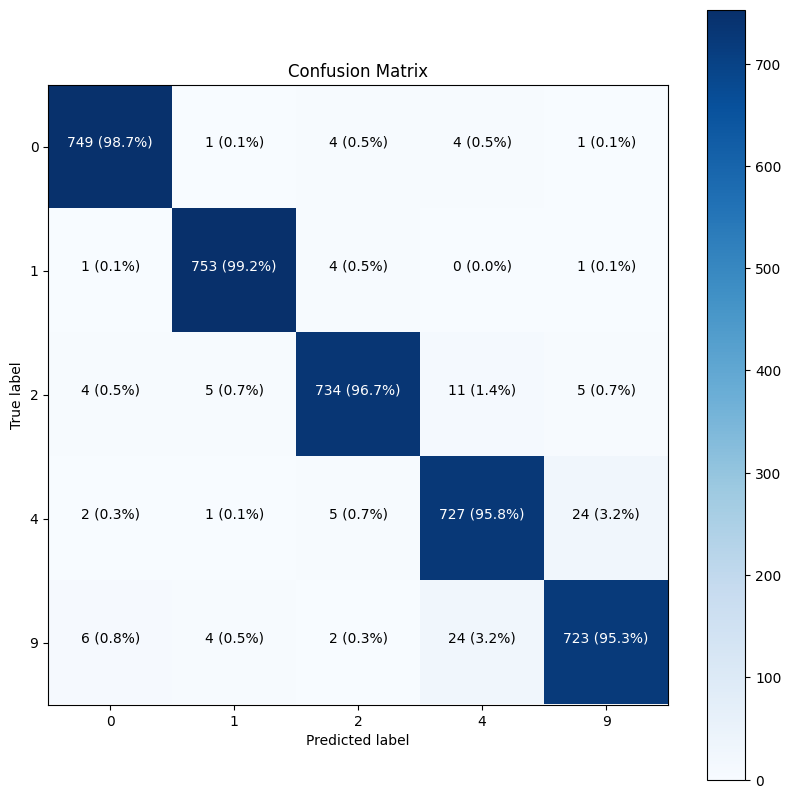

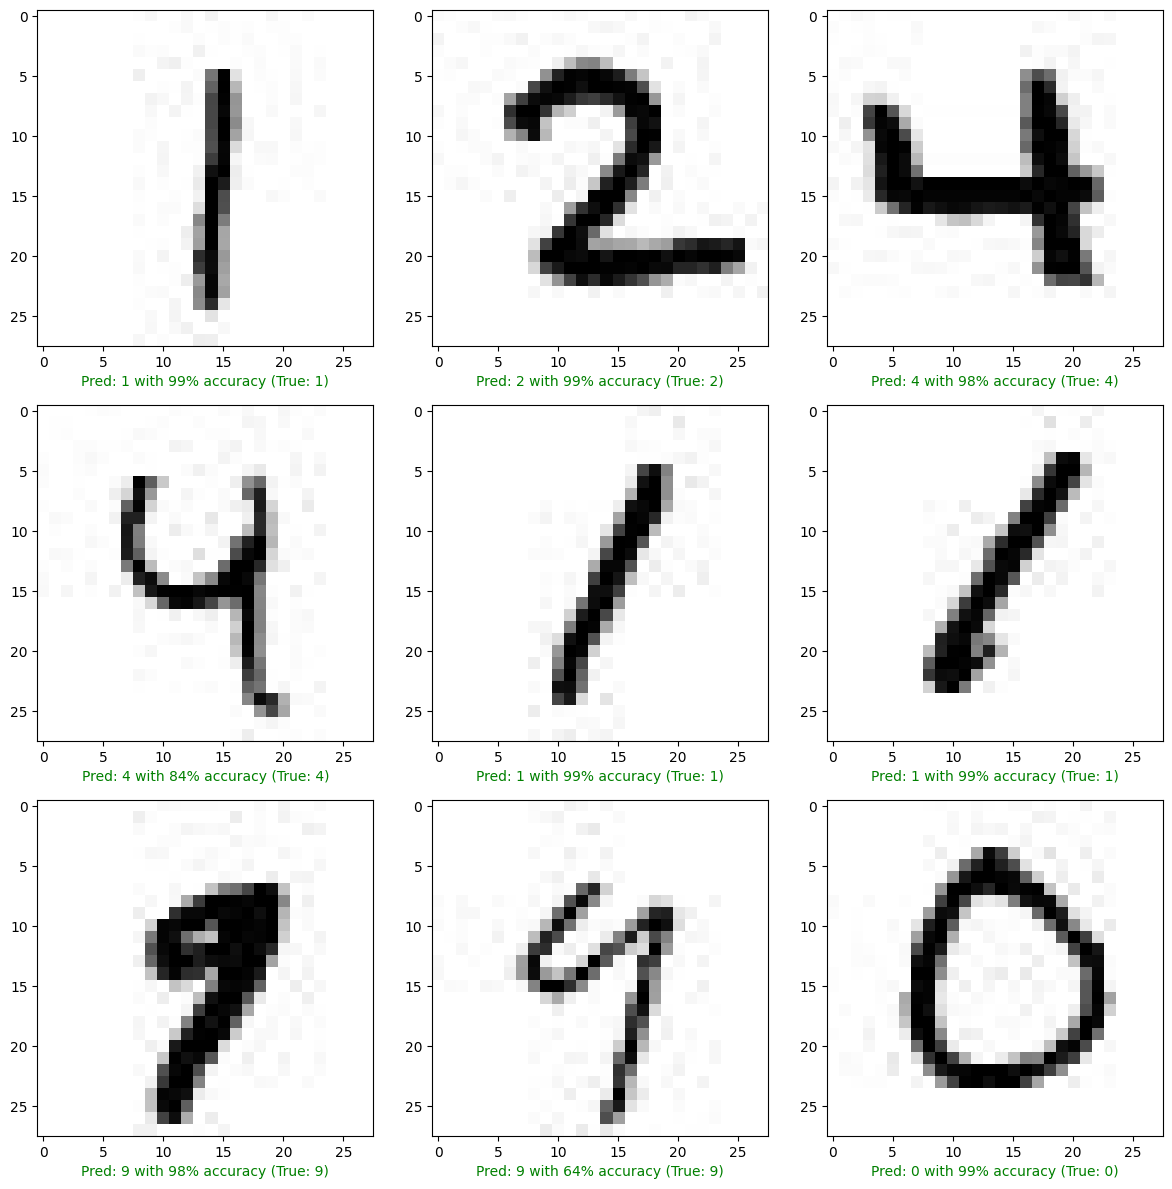

In [14]:
# %%script echo skipping
# Set random seed
tf.random.set_seed(random_state_global)

# Create the model
model_e = keras.Sequential([
  keras.Input(shape=(784,), name="Input_layer"),
  keras.layers.Dense(25, activation=Hidden_layer_Activation, name="Hidden_layer_I"),
  keras.layers.Dense(18, activation=Hidden_layer_Activation, name="Hidden_layer_II"),
  keras.layers.Dense(10, activation=Hidden_layer_Activation, name="Hidden_layer_III"), 
  keras.layers.Dense(Output_layer_N, activation=Output_layer_Activation, name="Output_layer")
], name='model_e')

# Compile the model
model_e.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                optimizer=keras.optimizers.Adagrad(learning_rate=learning_rate_val), 
                metrics=["accuracy"])


# Fit the model
history_e = model_e.fit(df_train.iloc[:,:-1],
                      df_train.iloc[:,-1],
                      epochs=epoch_val_e,
                      batch_size=batch_size_val_e,
                      validation_data=(df_valid.iloc[:,:-1], df_valid.iloc[:,-1]),
                      callbacks=[early_stopping_cb], verbose=0)

df_model_e_history = pd.DataFrame(history_e.history)

df_model_e_history.to_csv(f'{pathfinal}model_e_25_18_10_{history_e.epoch[-1]}.csv', index=False)
model_e.save(f'{pathfinal}model_e_25_18_10_{history_e.epoch[-1]}.h5') 

print(df_model_e_history)

showResults(model_e, df_model_e_history)